In [1]:
import numpy as np
import xgboost as xgb
from wideboost.wrappers import wxgb

from matplotlib import pyplot as plt

In [2]:
dtrain = xgb.DMatrix('../../xgboost/demo/data/agaricus.txt.train')
dtest = xgb.DMatrix('../../xgboost/demo/data/agaricus.txt.test')

[14:26:15] 6513x127 matrix with 143286 entries loaded from ../../xgboost/demo/data/agaricus.txt.train
[14:26:15] 1611x127 matrix with 35442 entries loaded from ../../xgboost/demo/data/agaricus.txt.test


In [3]:
param = {'max_depth':2, 'eta':0.1, 'objective':'binary:logistic','eval_metric':['error'] }
num_round = 50
watchlist = [(dtrain,'train'),(dtest,'test')]
xgb_results = dict()
bst = xgb.train(param, dtrain, num_round,watchlist,evals_result=xgb_results)

[0]	train-error:0.04652	test-error:0.04283
[1]	train-error:0.04161	test-error:0.04035
[2]	train-error:0.04652	test-error:0.04283
[3]	train-error:0.04161	test-error:0.04035
[4]	train-error:0.04161	test-error:0.04035
[5]	train-error:0.04161	test-error:0.04035
[6]	train-error:0.02334	test-error:0.02483
[7]	train-error:0.04161	test-error:0.04035
[8]	train-error:0.04161	test-error:0.04035
[9]	train-error:0.02334	test-error:0.02483
[10]	train-error:0.00599	test-error:0.00559
[11]	train-error:0.01735	test-error:0.01924
[12]	train-error:0.01735	test-error:0.01924
[13]	train-error:0.01735	test-error:0.01924
[14]	train-error:0.01735	test-error:0.01924
[15]	train-error:0.01735	test-error:0.01924
[16]	train-error:0.01735	test-error:0.01924
[17]	train-error:0.01735	test-error:0.01924
[18]	train-error:0.01336	test-error:0.01552
[19]	train-error:0.02150	test-error:0.02731
[20]	train-error:0.02150	test-error:0.02731
[21]	train-error:0.02150	test-error:0.02731
[22]	train-error:0.02150	test-error:0.0273

In [4]:
## Matches xgboost when there are zero extra dimensions
param['btype'] = 'I'
param['extra_dims'] = 0
wbst = wxgb.train(param, dtrain, num_round,watchlist)

Overwriting param `num_class`
Overwriting param `objective` while setting `obj` in train.
Taking first argument of eval_metric. Multiple evals not supported using xgboost backend.
Moving param `eval_metric` to an feval.
Setting param `disable_default_eval_metric` to 1.
[14:26:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { btype } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-error:0.04652	test-error:0.04283
[1]	train-error:0.04161	test-error:0.04035
[2]	train-error:0.04652	test-error:0.04283
[3]	train-error:0.04161	test-error:0.04035
[4]	train-error:0.04161	test-error:0.04035
[5]	train-error:0.04161	test-error:0.04035
[6]	train-error:0.02334	test-error:0.02483
[7]	train-error:0.04161	test-error:0.04035
[8]	train-error:0.04161	test-er

In [5]:
param['extra_dims'] = 2
ed1_results = dict()
wbst = wxgb.train(param, dtrain, num_round,watchlist,evals_result=ed1_results)

Overwriting param `num_class`
Overwriting param `objective` while setting `obj` in train.
Taking first argument of eval_metric. Multiple evals not supported using xgboost backend.
Moving param `eval_metric` to an feval.
Setting param `disable_default_eval_metric` to 1.
[14:26:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { btype } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-error:0.04652	test-error:0.04283
[1]	train-error:0.04652	test-error:0.04283
[2]	train-error:0.02334	test-error:0.02483
[3]	train-error:0.04161	test-error:0.04035
[4]	train-error:0.01735	test-error:0.01924
[5]	train-error:0.02226	test-error:0.02173
[6]	train-error:0.01735	test-error:0.01924
[7]	train-error:0.02549	test-error:0.03104
[8]	train-error:0.02150	test-er

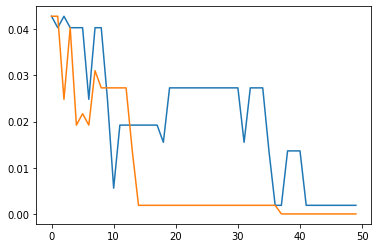

In [6]:
plt.plot(xgb_results['test']['error'])
plt.plot(ed1_results['test']['error'])
plt.show()